In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

In [2]:
# data 1~ n 까지 !
data1 = pd.read_csv("C:/Users/ASIA_07/유통프로젝트/truffle_insta{2655}.csv")
data2 = pd.read_csv("C:/Users/ASIA_07/유통프로젝트/truffle_insta{5278}.csv")
data3 = pd.read_csv("C:/Users/ASIA_07/유통프로젝트/truffle_insta{7935}.csv")
data4 = pd.read_csv("C:/Users/ASIA_07/유통프로젝트/truffle_insta{9811}.csv")

In [3]:
# https://yganalyst.github.io/data_handling/Pd_12/
data = pd.concat([data1, data2, data3, data4], axis = 0)  #행방향 연결, 데이터프레임
data

,Unnamed: 0,0
0,0,2019년 12월 31일
1,1,2019년 12월 31일
2,2,2019년 12월 31일
3,3,2019년 12월 31일
4,4,2019년 12월 31일
...,...,...
1853,1853,2019년 3월 26일
1854,1854,2019년 3월 26일
1855,1855,2019년 3월 26일
1856,1856,2019년 3월 26일


In [4]:
def my_process(data) :
    # data 날짜를 리스트로
    
    list_data = []
    for i in data['0'] :
        list_data.append(i)

    # data에서 2019년 빼기
    for i in range(len(list_data)) :
        list_data[i] = list_data[i][6:]
        
  
        
    return list_data

list_data = my_process(data)

In [5]:
def my_common(list_data) : 
    from collections import Counter
    count = Counter(list_data)

    count = sorted(count.items())
    return count

count = my_common(list_data)


date_list = []
for (i,a) in count :
    date_list.append(i)


In [6]:
# 정렬 ok 
def my_list1(list_data) :
    list_data = []
    for i in my_process(data) :
        if len(i) == 7 :
            a = str(i[:2]) + str(i[4:6])

        elif len(i) == 6 :
            if i[:2].isdigit() :
                a = str(i[:2]) + '0' + str(i[4])
            else :
                a = '0' + str(i[0]) + str(i[3:5])
        elif len(i) == 5 :
            a = '0' + str(i[0]) + '0' + str(i[3])

        list_data.append(a)
        
        list_data = list(set(list_data))
        list_data.sort()
    return list_data        
date_list = my_list1(date_list)

In [7]:
def sort_date(date_list) :
    for i in range(len(date_list)) :
        if str(date_list[i])[0] != '0' :
            date_list[i] = str(date_list[i])[:2] + '월 ' + str(date_list[i])[2:4] + '일'
        else :
            date_list[i] = str(date_list[i])[1] + '월 ' + str(date_list[i])[2:4] + '일'

        if str(date_list[i])[-3] == '0' :
            date_list[i] = str(date_list[i])[:-3] + str(date_list[i])[-2:]
    return date_list

date_list = sort_date(date_list)

In [8]:
data_num = {}
for (a,b) in count :
    data_num[a] = b
data_num

{'10월 10일': 39,
 '10월 11일': 33,
 '10월 12일': 37,
 '10월 13일': 19,
 '10월 14일': 33,
 '10월 15일': 39,
 '10월 16일': 34,
 '10월 17일': 22,
 '10월 18일': 26,
 '10월 19일': 24,
 '10월 1일': 26,
 '10월 20일': 30,
 '10월 21일': 26,
 '10월 22일': 33,
 '10월 23일': 38,
 '10월 24일': 34,
 '10월 25일': 28,
 '10월 26일': 30,
 '10월 27일': 36,
 '10월 28일': 22,
 '10월 29일': 21,
 '10월 2일': 21,
 '10월 30일': 32,
 '10월 31일': 27,
 '10월 3일': 34,
 '10월 4일': 31,
 '10월 5일': 23,
 '10월 6일': 35,
 '10월 7일': 26,
 '10월 8일': 30,
 '10월 9일': 39,
 '11월 10일': 27,
 '11월 11일': 31,
 '11월 12일': 45,
 '11월 13일': 38,
 '11월 14일': 32,
 '11월 15일': 25,
 '11월 16일': 38,
 '11월 17일': 36,
 '11월 18일': 27,
 '11월 19일': 37,
 '11월 1일': 37,
 '11월 20일': 34,
 '11월 21일': 38,
 '11월 22일': 36,
 '11월 23일': 37,
 '11월 24일': 37,
 '11월 25일': 29,
 '11월 26일': 24,
 '11월 27일': 26,
 '11월 28일': 31,
 '11월 29일': 26,
 '11월 2일': 23,
 '11월 30일': 30,
 '11월 3일': 40,
 '11월 4일': 28,
 '11월 5일': 37,
 '11월 6일': 32,
 '11월 7일': 27,
 '11월 8일': 39,
 '11월 9일': 26,
 '12월 10일': 26,
 '12월 11일': 42,
 '12월 12일'

In [9]:
list_data = my_list1(list_data)
date_list = my_list1(date_list)
date_list = sort_date(date_list)

In [10]:
data_num_1 = []
for i in date_list :
    data_num_1.append(data_num[i])

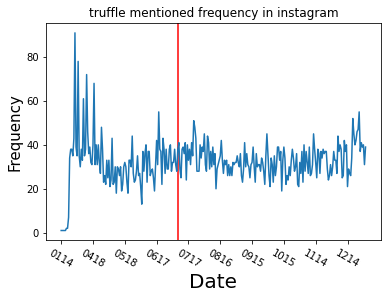

In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl


days=list_data 
days.sort()
xtic=np.arange(0,len(list_data),step=30)   
xdays=[days[i] for i in xtic] 
plt.xticks(xtic,xdays,rotation=-30)
plt.title("truffle mentioned frequency in instagram")   # 이름지정
plt.xlabel('Date', size = 20)
plt.ylabel('Frequency', size = 15)
plt.axvline(x=110,label="농심 트러플 짜파게티 출시", color='r')

plt.plot(list_data,data_num_1)
plt.show()

In [12]:
# 검산 
dict = {}
for i in date_list :
    dict[i] = data_num[i]
dict

{'1월 14일': 1,
 '1월 16일': 1,
 '2월 11일': 1,
 '3월 7일': 1,
 '3월 10일': 1,
 '3월 22일': 2,
 '3월 24일': 2,
 '3월 26일': 7,
 '3월 27일': 34,
 '3월 28일': 38,
 '3월 29일': 38,
 '3월 30일': 35,
 '3월 31일': 43,
 '4월 1일': 91,
 '4월 2일': 39,
 '4월 3일': 35,
 '4월 4일': 78,
 '4월 5일': 35,
 '4월 6일': 30,
 '4월 7일': 38,
 '4월 8일': 33,
 '4월 9일': 61,
 '4월 10일': 35,
 '4월 11일': 38,
 '4월 12일': 72,
 '4월 13일': 46,
 '4월 14일': 36,
 '4월 15일': 39,
 '4월 16일': 32,
 '4월 17일': 31,
 '4월 18일': 40,
 '4월 19일': 68,
 '4월 20일': 31,
 '4월 21일': 40,
 '4월 22일': 31,
 '4월 23일': 40,
 '4월 24일': 32,
 '4월 25일': 27,
 '4월 26일': 48,
 '4월 27일': 38,
 '4월 28일': 23,
 '4월 29일': 26,
 '4월 30일': 22,
 '5월 1일': 33,
 '5월 2일': 25,
 '5월 3일': 33,
 '5월 4일': 21,
 '5월 5일': 24,
 '5월 6일': 43,
 '5월 7일': 22,
 '5월 8일': 23,
 '5월 9일': 30,
 '5월 10일': 18,
 '5월 11일': 30,
 '5월 12일': 29,
 '5월 13일': 26,
 '5월 14일': 30,
 '5월 15일': 19,
 '5월 16일': 22,
 '5월 17일': 30,
 '5월 18일': 32,
 '5월 19일': 30,
 '5월 20일': 23,
 '5월 21일': 18,
 '5월 22일': 33,
 '5월 23일': 33,
 '5월 24일': 30,
 '5월 25일': 44,
 '5월 26

In [13]:
# data_num_1
# list_data